In [1]:
import pandas as pd
import numpy as np

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

### 导入原始数据

In [3]:
df_30_o = pd.read_csv('m30.csv')

In [4]:
df_30_o.head()

,date,open,close,high,low,volume,code
0,2017-12-21 14:30,10.13,10.13,10.14,10.12,6272.0,600838
1,2017-12-21 15:00,10.13,10.12,10.16,10.11,11846.0,600838
2,2017-12-22 10:00,10.08,10.11,10.12,10.06,4886.0,600838
3,2017-12-22 10:30,10.10,10.12,10.16,10.09,3922.0,600838
4,2017-12-22 11:00,10.12,10.08,10.14,10.06,4346.0,600838


### treat Time Index
#### from sql

In [4]:
def tmNorm(dataframe,tmcol):
    dataframe.loc[:,tmcol] = pd.to_datetime(dataframe[tmcol])
    dataframe.set_index(tmcol, inplace=True)
    return dataframe

In [5]:
df_1_o.drop('Tm.1', axis = 1, inplace=True)
df_1_o = tmNorm(df_1_o,'Tm')

In [6]:
df_30_o.drop('Tm.1', axis = 1, inplace=True)
df_30_o = tmNorm(df_30_o,'Tm')

ValueError: labels ['Tm.1'] not contained in axis

In [7]:
df_30_o.head(1)

,O,H,L,C,V,A
Tm,,,,,,
2017-12-01 09:30:00,5.06,5.06,5.02,5.05,7072.0,478655.0


#### from ts

In [5]:
df_30 = df_30_o.copy(True)

In [6]:
df_30_o.head();

In [7]:
df_30.head()

,date,open,close,high,low,volume,code
0,2017-12-21 14:30,10.13,10.13,10.14,10.12,6272.0,600838
1,2017-12-21 15:00,10.13,10.12,10.16,10.11,11846.0,600838
2,2017-12-22 10:00,10.08,10.11,10.12,10.06,4886.0,600838
3,2017-12-22 10:30,10.10,10.12,10.16,10.09,3922.0,600838
4,2017-12-22 11:00,10.12,10.08,10.14,10.06,4346.0,600838


In [8]:
df_30.loc[:,'date'] = pd.to_datetime(df_30['date'])

In [9]:
df_30.set_index('date', inplace=True)

In [10]:
df_30.columns = ['O','C','H','L','V','code']

### add calculated columns

In [11]:
def dfcal(dataframe):
    df = dataframe.copy()
    df.is_copy = False
    df.loc[:,'diff1'] = df.C.diff(1)
    df.loc[:,'drt'] = 0
    df.loc[:,'drtC'] = 0
    df.loc[df['diff1'] > 0,'drtC'] = 1
    df.loc[df['diff1'] < 0,'drtC'] = -1
    df.loc[:,'mono3'] = df.drtC.rolling(3).sum()
    df.loc[:,'diff2'] = df['diff1'].rolling(2).sum()
    df.loc[:,'diff3'] = df['diff1'].rolling(3).sum()
    df.loc[:,'pct1'] = df.C.pct_change().abs()
    df.loc[:,'pct2'] = df.C.pct_change(2).abs()
    df.loc[:,'pct3'] = df.C.pct_change(3).abs()
    df.loc[:,'stdF'] = 0
    return df

In [12]:
df30 = dfcal(df_30)

In [13]:
df30['idx'] = range(len(df30))
open00 = df30.iloc[0,0]

In [14]:
df30.head(5)

,O,C,H,L,V,code,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF,idx
date,,,,,,,,,,,,,,,,,
2017-12-21 14:30:00,10.13,10.13,10.14,10.12,6272.0,600838,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2017-12-21 15:00:00,10.13,10.12,10.16,10.11,11846.0,600838,-0.01,0,-1,NaN,NaN,NaN,0.000987,NaN,NaN,0,1
2017-12-22 10:00:00,10.08,10.11,10.12,10.06,4886.0,600838,-0.01,0,-1,-2.0,-0.02,NaN,0.000988,0.001974,NaN,0,2
2017-12-22 10:30:00,10.10,10.12,10.16,10.09,3922.0,600838,0.01,0,1,-1.0,0.00,-0.01,0.000989,0.000000,0.000987,0,3
2017-12-22 11:00:00,10.12,10.08,10.14,10.06,4346.0,600838,-0.04,0,-1,-1.0,-0.03,-0.04,0.003953,0.002967,0.003953,0,4


### Vistualized Analysis

In [15]:
q = [0,.125,.25,.5,.75,.875,1]

In [16]:
TmS = pd.to_datetime('2018-02-9 14:00')
TmE = pd.to_datetime('2018-02-26 14:30')

In [16]:
df_1['diff'].hist()

NameError: name 'df_1' is not defined

In [33]:
df_1['diff'].describe()

count    14531.000000
mean        -0.000020
std          0.011295
min         -0.230000
25%         -0.010000
50%          0.000000
75%          0.000000
max          0.420000
Name: diff, dtype: float64

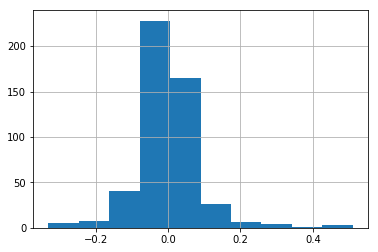

In [41]:
df_30['diff3'].hist()

In [48]:
df_30.diff3.describe(q)

count    486.000000
mean      -0.001955
std        0.086096
min       -0.330000
0%        -0.330000
12.5%     -0.070000
25%       -0.030000
50%        0.000000
75%        0.030000
87.5%      0.060000
100%       0.510000
max        0.510000
Name: diff3, dtype: float64

In [22]:
pd.value_counts(pd.qcut(df_30.C,q))

(4.62, 4.87]                 129
(4.87, 5.08]                 114
(5.08, 5.26]                  67
(4.34, 4.62]                  62
(4.098999999999999, 4.34]     62
(5.26, 6.0]                   55
Name: C, dtype: int64

In [37]:
df30[['pct3','pct2','pct1']].describe(q)

,pct3,pct2,pct1
count,483.000000,484.000000,485.000000
mean,0.010301,0.008310,0.005769
std,0.015312,0.013304,0.010457
min,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000
12.5%,0.001132,0.001039,0.001016
25%,0.002322,0.002138,0.001167
50%,0.005663,0.004497,0.003046
75%,0.010433,0.008310,0.005800
87.5%,0.018640,0.014447,0.009994


In [17]:
q875_thread = df30[['pct1','pct2','pct3']].quantile(0.875).tolist()
q875_thread

[0.009993918530503909, 0.014446876482462567, 0.018639592269729333]

In [18]:
type(q875_thread)

list

In [74]:
df30xx.sort_values('pct3', ascending=False).head()

,O,H,L,C,V,A,diff1,drtC,mono3,diff2,diff3,pct1,pct2,pct3
Tm,,,,,,,,,,,,,,
2018-02-12 09:30:00,4.17,4.24,4.16,4.22,13236.0,287813.0,0.09,1,3.0,0.10,0.12,0.021792,0.024272,0.029268
2018-02-12 10:00:00,4.21,4.27,4.21,4.24,9682.0,205379.0,0.02,1,3.0,0.11,0.12,0.004739,0.026634,0.029126
2018-02-12 10:30:00,4.24,4.26,4.22,4.25,7099.0,19080.0,0.01,1,3.0,0.03,0.12,0.002358,0.007109,0.029056
2018-02-22 10:00:00,4.31,4.35,4.30,4.33,4436.0,48675.0,0.02,1,3.0,0.07,0.08,0.004640,0.016432,0.018824
2018-02-22 10:30:00,4.33,4.34,4.32,4.33,3160.0,105009.0,0.00,0,2.0,0.02,0.07,0.000000,0.004640,0.016432


### Gen DataFrame Index
#### tm_idx_dict /tmstampL, col_idx_dict / colL

In [19]:
# Gen Time Index Dictionary 
tmstampL = df30.index.tolist()
idx = list(range(len(tmstampL)))
tm_idx_dict = dict(zip(tmstampL,idx))

In [20]:
tm_idx_dict[TmS]

279

In [21]:
colL = df30.columns.tolist()
idx = list(range(len(colL)))
col_idx_dict = dict(zip(colL,idx))

In [22]:
col_idx_dict['H']

2

### Search Flag Mode

In [40]:
df30.iloc[10:20]

,O,C,H,L,V,code,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF,idx
date,,,,,,,,,,,,,,,,,
2017-12-25 10:00:00,9.83,9.88,9.92,9.82,7285.0,600838,-0.01,0,-1,-3.0,-0.11,-0.13,0.001011,0.011011,0.012987,0,10
2017-12-25 10:30:00,9.88,9.84,9.89,9.81,5465.0,600838,-0.04,0,-1,-3.0,-0.05,-0.15,0.004049,0.005056,0.015015,0,11
2017-12-25 11:00:00,9.84,9.85,9.85,9.81,2743.0,600838,0.01,0,1,-1.0,-0.03,-0.04,0.001016,0.003036,0.004044,0,12
2017-12-25 11:30:00,9.85,9.81,9.85,9.80,3030.0,600838,-0.04,0,-1,-1.0,-0.03,-0.07,0.004061,0.003049,0.007085,0,13
2017-12-25 13:30:00,9.81,9.83,9.90,9.80,5647.0,600838,0.02,0,1,1.0,-0.02,-0.01,0.002039,0.002030,0.001016,0,14
2017-12-25 14:00:00,9.83,9.81,9.84,9.79,3058.0,600838,-0.02,0,-1,-1.0,0.00,-0.04,0.002035,0.000000,0.004061,0,15
2017-12-25 14:30:00,9.82,9.67,9.82,9.66,6819.0,600838,-0.14,0,-1,-1.0,-0.16,-0.14,0.014271,0.016277,0.014271,0,16
2017-12-25 15:00:00,9.67,9.66,9.69,9.57,8415.0,600838,-0.01,0,-1,-3.0,-0.15,-0.17,0.001034,0.015291,0.017294,0,17
2017-12-26 10:00:00,9.68,9.81,9.87,9.68,9736.0,600838,0.15,0,1,-1.0,0.14,0.00,0.015528,0.014478,0.000000,0,18


In [24]:
arr30 = df30[['O','C']].values  # numpy.ndarray
arr30[2:5]

array([[10.08, 10.11],
       [10.1 , 10.12],
       [10.12, 10.08]])

In [25]:
i = 4
aa = arr30[i-4:i,0:2]  # 2 x 4
aa

array([[10.13, 10.13],
       [10.13, 10.12],
       [10.08, 10.11],
       [10.1 , 10.12]])

In [26]:
arr30[0,0]

10.13

In [27]:
# Calculate pct by loop
def pct123(ocArr):  # ocArr 2 x 4
    e = ocArr[3,1]
    s1 = ocArr[2,1]
    s2 = ocArr[1,1]
    s3 = ocArr[0,1]
    pct1 = abs((e-s1)/s1)
    pct2 = abs((e-s2)/s2)
    pct3 = abs((e-s3)/s3)
    pct = np.array([pct1,pct2,pct3])
    return pct

In [28]:
p = pct123(aa)  #array([0.00098912, 0.        , 0.00098717])
r = p > q875_thread  # array([False, False, False])
r.sum() > 0 # >> find a stick
peak_position = np.array([-1,-2,-3])*r  #  array([-1,0,0])
pp = peak_position.min()  # get the SHIFT of the start point of a stick


In [29]:
class Stick(object):
    crt_status = 'close'
    
    def __init__(self, startTm, crtTm):
        self.TmS = startTm
        self.TmE = crtTm
        self.TmI = crtTm
        self.drt = 0
        Stick.crt_status = 'open'

    def terminate(self,crtTm=None):
        self.TmE = crtTm
        Stick.crt_status = 'close'
        return True

In [30]:
stL = []
for i in range(len(arr30)):
    '''
    find big move:
    1. GET np.array([pct1,pct2,pct3]). (pct_chagne between 1 or 2 or 3 bars)
    '''
    if i>3:
        arr = arr30[i-4:i,0:2]
        p = pct123(arr)  
        r = p > q875_thread  # array([False, False, False])
        if r.sum() > 0: # >>> find a stick
            if len(stL)==0 or stL[-1].crt_status=='close':
                peak_position = np.array([-1,-2,-3])*r  #  array([-1,0,0])
                stL.append(Stick(i+peak_position.min(),i))
        else:
            if len(stL)>0:
                stL[-1].terminate(i)

In [31]:
x,y = list(),list()
arr = df30['L'].values
for st in stL:
    x.append(st.TmS)
    y.append(arr[st.TmS])

### Gen stdK

In [23]:
df30.head()

,O,C,H,L,V,code,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF,idx
date,,,,,,,,,,,,,,,,,
2017-12-21 14:30:00,10.13,10.13,10.14,10.12,6272.0,600838,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2017-12-21 15:00:00,10.13,10.12,10.16,10.11,11846.0,600838,-0.01,0,-1,NaN,NaN,NaN,0.000987,NaN,NaN,0,1
2017-12-22 10:00:00,10.08,10.11,10.12,10.06,4886.0,600838,-0.01,0,-1,-2.0,-0.02,NaN,0.000988,0.001974,NaN,0,2
2017-12-22 10:30:00,10.10,10.12,10.16,10.09,3922.0,600838,0.01,0,1,-1.0,0.00,-0.01,0.000989,0.000000,0.000987,0,3
2017-12-22 11:00:00,10.12,10.08,10.14,10.06,4346.0,600838,-0.04,0,-1,-1.0,-0.03,-0.04,0.003953,0.002967,0.003953,0,4


* df_std = df_30.loc[:,['H','L']] # copy
* df_std = df_30.loc[:,['H','L']].copy() # copy
* df_std['H'] = df_30['H']    # copy
* df_std['L'] = df_30.loc[:,'L']  # copy


In [24]:
df_std = pd.DataFrame()
df_std['H'] = df30['H']
df_std['L'] = df30.loc[:,'L']

#df_std = df_std.merge(df_30.loc[:,['H','L']].shift(), how='left',left_index=True, right_index=True,copy=True)
#df_std.iloc[0,[2,3]] = (5.10,5.06)

In [25]:
df_std.loc[:,'drt'] = 0
df_std.loc[:,'stdF'] = 1


In [26]:
df_std.head()

,H,L,drt,stdF
date,,,,
2017-12-21 14:30:00,10.14,10.12,0,1
2017-12-21 15:00:00,10.16,10.11,0,1
2017-12-22 10:00:00,10.12,10.06,0,1
2017-12-22 10:30:00,10.16,10.09,0,1
2017-12-22 11:00:00,10.14,10.06,0,1


In [27]:
arr_std = df_std.values

In [28]:
def gen_stdk(s1,s2):
    '''
    s[H,L,drt,stdF]
    '''
    if (s1[0] < s2[0]) & (s1[1] < s2[1]):
        s2[2:] = [1,1]
    elif (s1[0] > s2[0]) & (s1[1] > s2[1]):
        s2[2:] = [-1,1]
    else:
        if s1[2] == 1:
            if s1[0] < s2[0]:
                s2 = [s2[0],max(s1[1],s2[1]), 1, 1]
            else:
                s2 = [s1[0],max(s1[1],s2[1]), 1, 0]
        elif s1[2] == -1:
            if s1[1] > s2[1]:
                s2 = [min(s1[0],s2[0]), s2[1], -1, 1]
            else:
                s2 = [min(s1[0],s2[0]), s1[1], -1, 0]
        else:
            s2 = [min(s1[0],s2[0]),max(s1[1],s2[1]), 0, 0]
    return s2

In [29]:
tmp = list(arr_std[0,0:3])
tmp.append(0)

In [30]:
%%time
list_std = [tmp]
for i in range(len(arr_std)):
    if i>0:
        arr_std[i] = gen_stdk(arr_std[i-1],arr_std[i])
        if arr_std[i,3] == 1:
            tmp = list(arr_std[i,0:3])
            tmp.append(i)
            list_std.append(tmp)
        

Wall time: 2.97 ms


In [31]:
list_std_col = ['H','L','drt','idx']

In [32]:
df_std = pd.DataFrame(list_std,columns = list_std_col)

In [33]:
df_std.head()

,H,L,drt,idx
0,10.14,10.12,0.0,0
1,10.12,10.06,-1.0,2
2,10.16,10.09,1.0,3
3,10.14,10.06,-1.0,4
4,10.08,9.98,-1.0,5


### Get Lv0

In [34]:
df_Lv0 = df_std.copy(True)
df_Lv0['cnt_up'] = 2
df_Lv0['cnt_dn'] = 2
df_Lv0['nflag'] = 0

arr_Lv0 = df_Lv0[['H','L','cnt_up','cnt_dn','idx']].values
arr_Lv0[0]

array([10.14, 10.12,  2.  ,  2.  ,  0.  ])

In [35]:
df_Lv0.head(1)

,H,L,drt,idx,cnt_up,cnt_dn,nflag
0,10.14,10.12,0.0,0,2,2,0


In [36]:
list_Lv0 = [[open00, 0., 0]]
list_Lv0_col = ['V','drt','idx']

In [37]:
arr3 = arr_Lv0[0:3,0:2]
arr3

array([[10.14, 10.12],
       [10.12, 10.06],
       [10.16, 10.09]])

In [38]:
def fPeak(arr3):
    '''
    input: arr3 = [0:3,0:2]  ['H','L']
    中间H最高：-1
    中间L最低： 1
    '''
    if (arr3[0,0] < arr3[1,0]) & (arr3[1,0] > arr3[2,0]):
        zig = -1
    elif (arr3[0,1] > arr3[1,1]) & (arr3[1,1] < arr3[2,1]):
        zig = 1
    else:
        zig = 0
    return zig

In [39]:
def gen_Lv0(LvL,arr3):
    '''
    lastP: 前峰list;  [['V','drt','idx']] 
    arr3 = 已完结的前3个std bar; 
           arr_Lv0[0:3,0:4]  ['H','L','cnt_up','cnt_dn','idx']
    没峰：
        最后Bar cnt +1，flag = 0; 
    顶峰（-1）：
        与前峰反向，长度够：newLv0, 最后bar cnt = 1，flag = 1;
        与前峰同向，新极值：newLv0, 最后bar cnt = 1，flag = -1;
    '''
    zig = fPeak(arr3[:,0:2])
    flag = 0
    if zig == 0:
        arr3[2,2],arr3[2,3] = arr3[1,2]+1, arr3[1,3]+1
        flag = 0
    elif zig == -1:
        if (LvL[-1][1]!= -1) & (arr3[1,2]>3):
            LvL.append([arr3[1,0],-1,arr3[1,4]])
            arr3[2,2],arr3[2,3] = 1,1
            flag = 1
        elif (LvL[-1][1] == -1) & (arr3[1,0] >= LvL[-1][0]):
            LvL[-1] = [arr3[1,0],-1,arr3[1,4]]
            arr3[2,2],arr3[2,3] = 1,1
            flag = -1
    elif zig == 1:
        if (LvL[-1][1] != 1) & (arr3[1,3] > 3):
            LvL.append([arr3[1,1], 1,arr3[1,4]])
            arr3[2,2],arr3[2,3] = 1,1
            flag = 1
        elif (LvL[-1][1] == 1) & (arr3[1,1] <= LvL[-1][0]):
            LvL[-1] = [arr3[1,1], 1, arr3[1,4]]
            arr3[2,2],arr3[2,3] = 1,1
            flag = -1
    return flag
            
        
        

In [40]:
%%time
for i in range(len(arr_Lv0)):
    if i > 3:
        arr_w = arr_Lv0[i-3:i,:]
        gen_Lv0(list_Lv0,arr_w)

Wall time: 2.97 ms


In [41]:
list_Lv0[-1]
len(list_Lv0)
list_Lv0

[[10.13, 0.0, 0],
 [9.57, 1, 17.0],
 [9.91, -1, 29.0],
 [9.73, 1, 34.0],
 [10.25, -1, 69.0],
 [9.82, 1, 106.0],
 [10.03, -1, 116.0],
 [9.52, 1, 129.0],
 [9.71, -1, 143.0],
 [9.46, 1, 162.0],
 [9.8, -1, 192.0],
 [7.76, 1, 280.0],
 [8.67, -1, 336.0],
 [8.44, 1, 346.0],
 [9.14, -1, 412.0],
 [8.68, 1, 428.0],
 [9.65, -1, 458.0],
 [8.98, 1, 466.0],
 [10.97, -1, 475.0],
 [10.02, 1, 480.0]]

### Class N

In [44]:
class stFlag(object):
    def __init__(self,point1,point2, outer_stFlag=None):
        self.status = 0
        measure_flag = 0
        self.drt = point1[1]
        self.stTmS = point1[2]
        self.stTmE = point2[2]
        self.destroyV = point1[0]
        self.rangeV = point2[0]
        self.ctTmS = self.stTmE
        self.ctTmE = None
        if self.drt == 1:   # Upward Flag
            self.ctH = point2[0]
            self.ctL = None
        else:
            self.ctL = point2[0]
            self.ctH = None
        self.outRange = None
        if outer_stFlag is not None:
            self.outRange = outer_stFlag    # [H,L]
        self.startP = point1
        self.endP = point2
        #self.list_P = [point1,point2]
    
    def update(self,point):
        '''
        point.drt == self.drt:
            if status = 0:
                within destroyV >>> updated, status= 1, measure_flag = 1
                outoff destroyV >>> destroy
            if status = 1:
                within destroyV >>> updated;
                outoff destroyV >>> new, reverse drt
        point.drt <> self.drt:  
            only status =1:
                within rangeV >>> updated;
                outoff rangeV >>> new, same drt
        Return:
        1. destroy, NewObject
        2. update, None
        3. new, newObject
        ''' 
        if point[1] == self.drt:
            if status == 0:
                if (((self.drt == 1) & (point[0] <= self.destroyV))|
                   ((self.drt == -1) & (point[0] >= self.destroyV))):
                    return 'destroy', stFlag(self.endP,point)
                elif (((self.drt == 1) & (point[0] > self.destroyV))|
                   ((self.drt == -1) & (point[0] < self.destroyV))):
                    self.measure_flag = 1
                    self.endP = point
                    self.updateCt(point)
                    self.status = 1
                    return 'update', None
            elif status == 1:
                if (((self.drt == 1) & (point[0] <= self.destroyV))|
                   ((self.drt == -1) & (point[0] >= self.destroyV))):
                    return 'new', stFlag(self.endP,point)
                elif (((self.drt == 1) & (point[0] > self.destroyV))|
                   ((self.drt == -1) & (point[0] < self.destroyV))):
                    self.endP = point
                    self.updateCt(point)
                    return 'update', None
        elif point[1] != self.drt:
            if (((self.drt == 1) & (point[0] <= self.rangeV))|
               ((self.drt == -1) & (point[0] >= self.rangeV))):
                self.endP = point
                self.updateCt(point)
                return 'update', None
            elif (((self.drt == 1) & (point[0] > self.rangeV))|
               ((self.drt == -1) & (point[0] < self.rangeV))):
                return 'new', stFlag(self.endP, point)
            
    
    def updateCt(self,point):
        self.ctTmE = point[2]
        if status == 0:
            if self.drt == 1:
                self.ctL = point[0]
            else:
                self.ctH = point[0]
        else:
            if point[1] == -1:
                self.ctH = min(self.ctH, point[0])
            else:
                self.ctL = max(self.ctL, point[0])
        return None
        
    def index(self):
        return self.stTmS
        

In [45]:
class Segment(object):
    def __init__(self,point1,point2, outer_stFlag=None):
        self.status = 0
        tmp = stFlag(point1, point2, outer_stFlag)
        self.list_flg = [tmp]
        self.drt = point1[1]
        self.flag_cnt = 0
        self.startP = None
        self.endP = None  # 做连接用的
        
    def update(self, point):
        '''
        update flg;
        if flg update & measure & drt<> :
            flg_cnt += 1; 
            if flg_cnt ==2: >>> new segment                
        if flg update & goon: pass
        if flg new & drt<>: flgL.append; flg_cnt +=1;
        if flg new & drt==: flgL.append; endP; flg_cnt = 0;          
        if flg destroy:
            reinitiate Segment;  >>> destroy
            
        Return:
        1. new, newSeg, p_sub_flag
        2. update, None, p_sub_flag
        3. destroy, None, p_sub_flag
        '''
        p_sub = 1
        newSg = None
        ff,tmp = self.list_flg[-1].update(point)
        if ff =='update': tmp = self.list_flg[-1]
        if (ff == 'update'):
            if (tmp.measure_flag == 1) & (tmp.drt != self.drt):
                self.flg_cnt += 1
                if self.flg_cnt == 2:
                    self.endP = self.list_flg[-2].startP
                    sig = 'new'
                    newSg = Segment()
            else:
                sig = 'update'
        if ff == 'new':
            p_sub = 0
            if tmp.drt != self.drt:
                self.list_flg.append(tmp)
                self.flg_cnt +=1
                sig = 'update'
            elif tmp.drt == self.drt:
                self.list_flg.append(tmp)
                self.endP = tmp.startP
                selg.flg_cnt = 0
                sig = 'update'
        if ff == 'destroy':
            sig == ff
            p_sub = 0
            newSg = Segment()
        return sig,newSg,p_sub    

    def index(self):
        return self.list_flg[0].index()

In [ ]:
list_Lv = [SegmentObj]
list_openSg = [[]]
sub_flag = 1
for sg in list_openSg:
    ff,tmp,flag = sg.update(P)
    if ff == 'destroy':
        list_Lv[0]
    if (ff == 'new'):        
        list_Lv.append(tmp)
    if flag == 0:
        sub_flag = 0
if sub_flag == 1:
    list_openSg.append(Segment())
        
    

#### open_Lv1:  [ 'idx' ] *8

In [ ]:
list_Lv1P_00 = [['V', 0, 0]]
list_Lv1P_11 = [['V', 0, 0, 'E']]

#### N_status

In [ ]:
N_status = [0,0,0,0,0,0,0,0]

#### dict_Lv1SG:  { 'Lv1_00_idx': [ sg1, st\g2,... ] , ... }
segment: [p1,p2]  
point: ['V', 'drt', 'idx']


### Vistualization

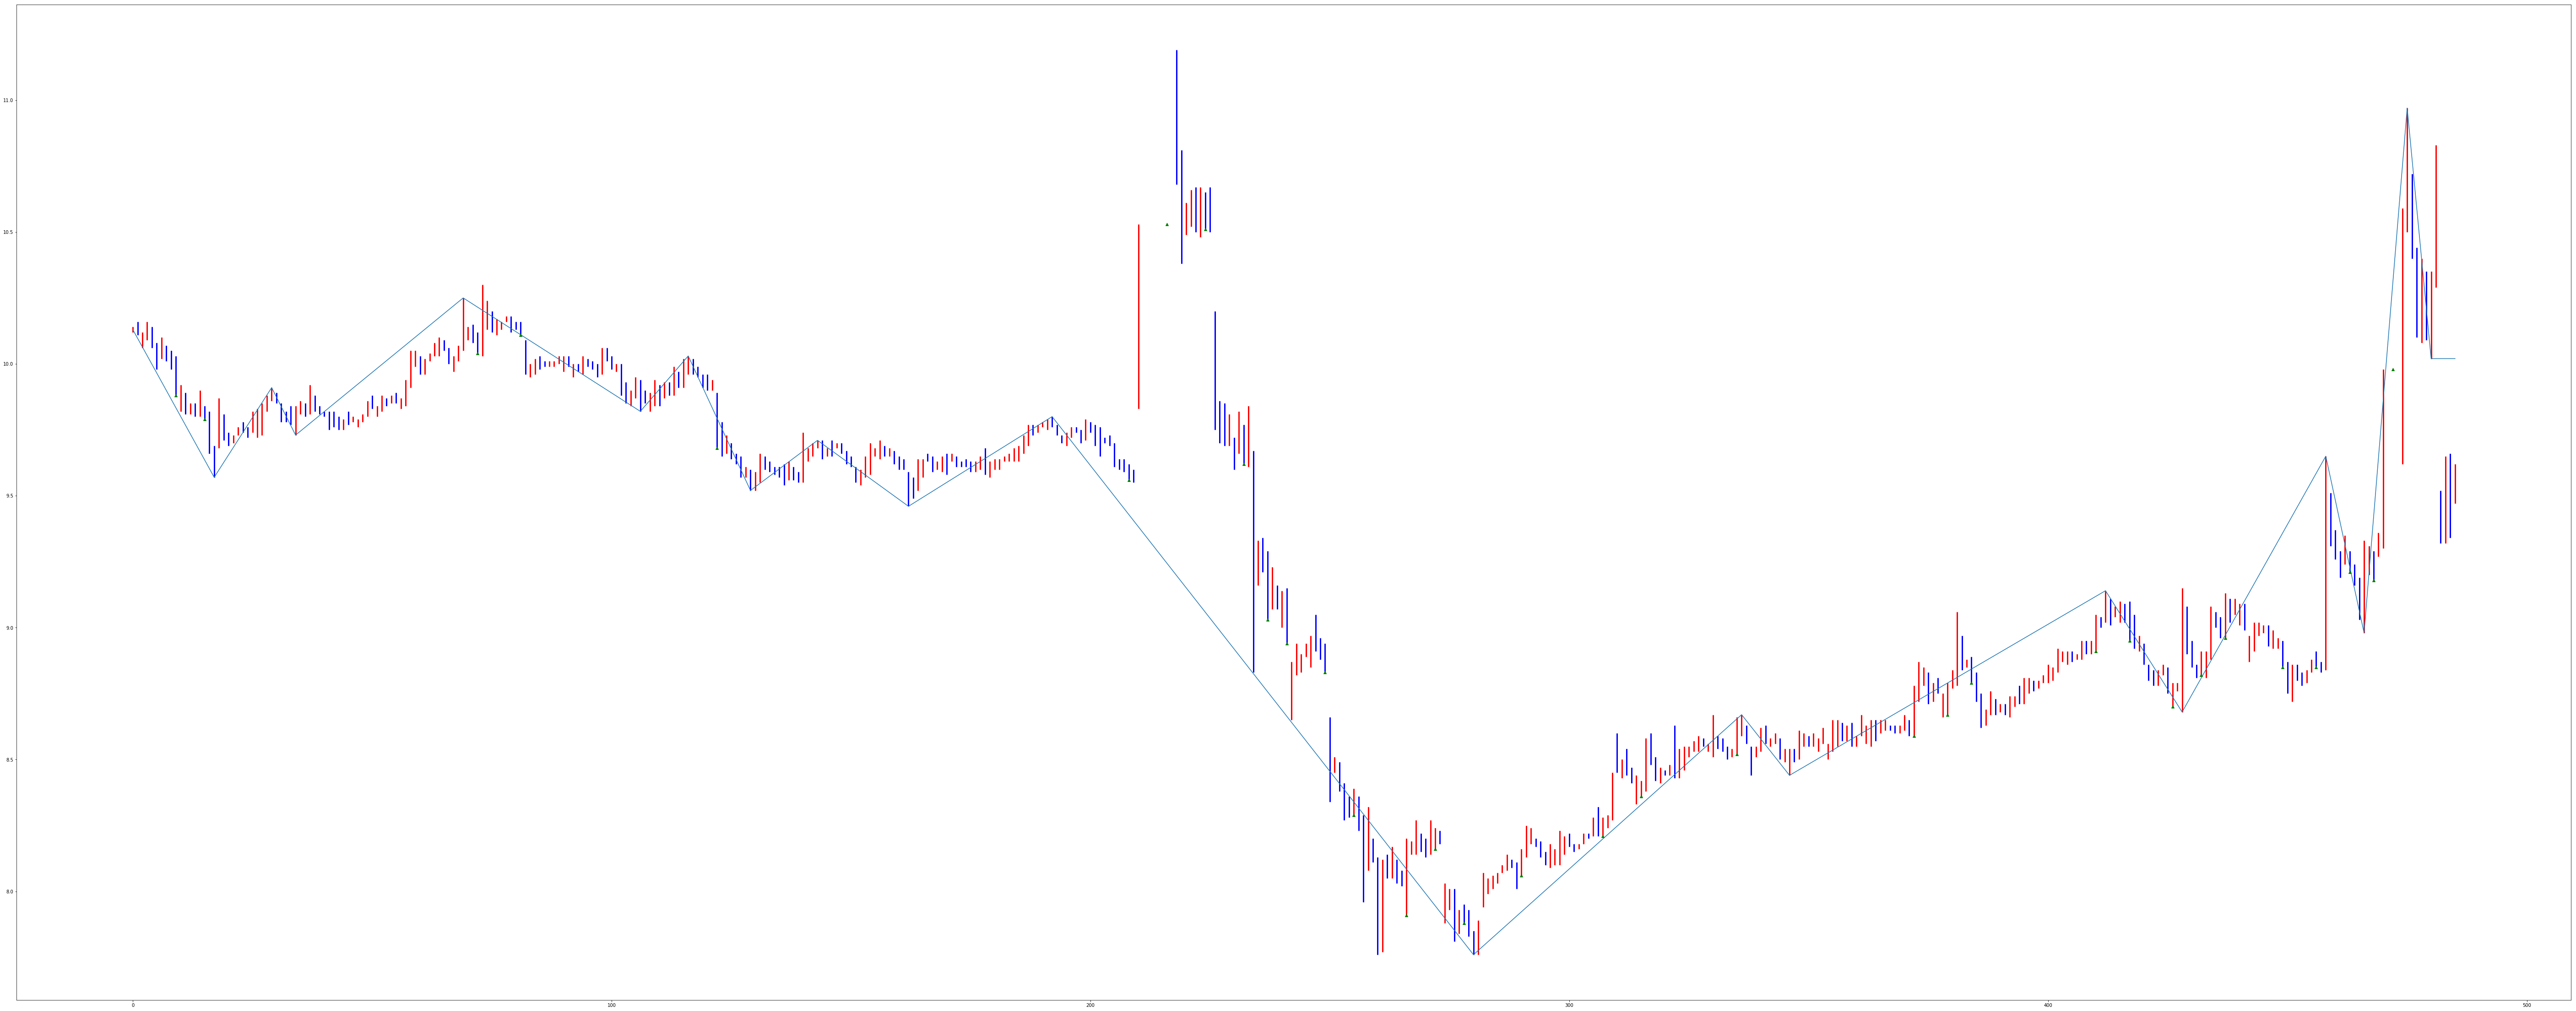

In [168]:
fig = plt.figure('Bar chart & Pie chart',figsize = (100,40))
ax = fig.add_subplot(111)
#fig,ax = plt.subplots(figsize = (100,40))
ax.vlines(arr_upBars[:,0],arr_upBars[:,1],arr_upBars[:,2],color = 'r',lw = 3)
ax.vlines(arr_dnBars[:,0],arr_dnBars[:,1],arr_dnBars[:,2],color = 'b',lw = 3)
ax = df_draw['V'].plot()
ax.plot(x,y, 'g^')
plt.savefig("000.png") 

In [164]:
df_Lv0 = pd.DataFrame(list_Lv0,columns = list_Lv0_col)
df_Lv0.head()

,V,drt,idx
0,10.13,0.0,0.0
1,9.57,1.0,17.0
2,9.91,-1.0,29.0
3,9.73,1.0,34.0
4,10.25,-1.0,69.0


In [165]:
df_draw = df30[['H','L','O','C','idx']]
df_draw = df_draw.merge(df_Lv0, how='left', left_on='idx', right_on='idx')

In [166]:
df_draw['V'].interpolate(inplace=True)

In [167]:
df_draw.head()

,H,L,idx,V,drt
0,10.14,10.12,0,10.130000,0.0
1,10.16,10.11,1,10.097059,NaN
2,10.12,10.06,2,10.064118,NaN
3,10.16,10.09,3,10.031176,NaN
4,10.14,10.06,4,9.998235,NaN


In [46]:
arr_upBars = df_draw.query('O<=C')[['idx','L','H']].values
arr_dnBars = df_draw.query('O>C')[['idx','L','H']].values